Clinical Dataset of the CYP-Guides Trial

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
clinic_df = pd.read_csv("../data/Dataset.csv")
clinic_df.head(3)

,ID,GENDER,AGE,RACE/ETHNICITY,Diagnosis,MD,Assignment,EMR,LOS,RAR,...,X,Y,Z,AA,AB,AC,AD,# Psychotropic Medications,# Administrations,Therapeutic Guidances
0,1,F,49,W,"MDD, Recurrent, Unspecified",L,G,C,70,0,...,0,0,0,0,1,0,0,3,6,EG
1,2,F,21,W,"MDD, Recurrent, Unspecified",A,G,C,309,0,...,0,13,0,0,0,0,0,3,27,CT
2,3,M,28,L,"MDD, Single Episode, Severe With Psychotic Fea...",I,G,C,376,0,...,0,0,15,0,4,0,0,6,64,CT


In [104]:
clinic_df.shape

(1500, 43)

In [105]:
clinic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1500 non-null   int64 
 1   GENDER                      1500 non-null   object
 2   AGE                         1500 non-null   int64 
 3   RACE/ETHNICITY              1500 non-null   object
 4   Diagnosis                   1500 non-null   object
 5   MD                          1500 non-null   object
 6   Assignment                  1459 non-null   object
 7   EMR                         1500 non-null   object
 8   LOS                         1500 non-null   int64 
 9   RAR                         1500 non-null   int64 
 10  A                           1500 non-null   int64 
 11  B                           1500 non-null   int64 
 12  C                           1500 non-null   int64 
 13  D                           1500 non-null   int6

PART 1: Determine which Assignment group shows better result

In [106]:
# i.e assignment group (G and S) vs results (LOS, RAR)
# Hypothesis: G group should show better recovery

In [107]:
# rename LOS, RAR
clinic_df.rename(columns={"LOS": "StayLength", "RAR": "Re_admission"},inplace= True)
clinic_df.head(3)

,ID,GENDER,AGE,RACE/ETHNICITY,Diagnosis,MD,Assignment,EMR,StayLength,Re_admission,...,X,Y,Z,AA,AB,AC,AD,# Psychotropic Medications,# Administrations,Therapeutic Guidances
0,1,F,49,W,"MDD, Recurrent, Unspecified",L,G,C,70,0,...,0,0,0,0,1,0,0,3,6,EG
1,2,F,21,W,"MDD, Recurrent, Unspecified",A,G,C,309,0,...,0,13,0,0,0,0,0,3,27,CT
2,3,M,28,L,"MDD, Single Episode, Severe With Psychotic Fea...",I,G,C,376,0,...,0,0,15,0,4,0,0,6,64,CT


In [108]:
# Assignment has null object
clinic_df["Assignment"].value_counts(dropna= False)

G      982
S      477
NaN     41
Name: Assignment, dtype: int64

In [109]:
# 41 object has no assignment
# convert null to S assignment
# not being in G means effectively being S
clinic_df["Assignment"] = clinic_df["Assignment"].fillna(value = "S")

In [110]:
clinic_df["Assignment"].value_counts(dropna= False)

G    982
S    518
Name: Assignment, dtype: int64

PART 1.1 How many cases of re-admission for each assignment group
(Re-hospitalization within 30 days, 1 for positive, 0 for negative)

In [111]:
clinic_df.groupby("Assignment")["Re_admission"].sum()

Assignment
G    99
S    43
Name: Re_admission, dtype: int64

In [112]:
# in percent of total member in each assignment
def convert_percent(x,y):
    return x / y *100

In [113]:
# Group G
convert_percent(99,982)

10.081466395112017

In [114]:
# Group S
convert_percent(43,518)

8.301158301158301

PART 1.2 Length of stay for treatment for each assignment group

In [115]:
clinic_df.groupby("Assignment")["StayLength"].describe()

,count,mean,std,min,25%,50%,75%,max
Assignment,,,,,,,,
G,982.0,178.511202,186.889539,14.0,90.0,139.5,189.75,2776.0
S,518.0,172.747104,147.474404,6.0,89.0,135.0,202.00,1629.0


In [116]:
boxpfG = clinic_df[clinic_df["Assignment"]=="G"]["StayLength"]

In [117]:
boxpfG.head(15)

0      70
1     309
2     376
3     115
6     113
8      44
10     67
11    135
12    170
13    156
14    104
15     18
17    140
18    142
19    116
Name: StayLength, dtype: int64

In [118]:
boxpfG.shape

(982,)

<AxesSubplot:>

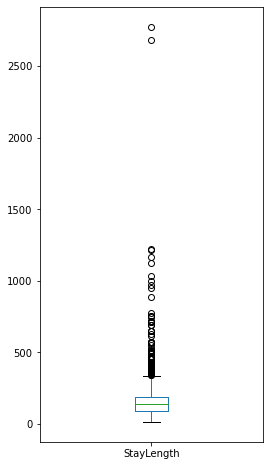

In [119]:
plt.rcParams["figure.figsize"] = (4,8)
boxpfG.plot(kind = "box")

In [120]:
# there are methods in scipy

In [121]:
# remove the top 1% (15) of data for sake of comparison
clinic_df[clinic_df["Assignment"]=="G"].nlargest(15,"StayLength")

,ID,GENDER,AGE,RACE/ETHNICITY,Diagnosis,MD,Assignment,EMR,StayLength,Re_admission,...,X,Y,Z,AA,AB,AC,AD,# Psychotropic Medications,# Administrations,Therapeutic Guidances
425,426,M,21,W,"MDD, Single Episode, Severe With Psychotic Fea...",W,G,C,2776,0,...,0,12,0,0,26,0,0,6,175,EG
1059,1060,F,66,W,Unspecified Depressive Disorder,T,G,E,2685,0,...,0,0,0,0,111,0,0,6,448,EG
756,757,F,30,W,MDD,R,G,E,1223,0,...,0,51,0,6,0,0,8,4,70,EG
839,840,M,25,W,"MDD, Recurrent, Severe Without Psychotic Features",T,G,E,1215,1,...,59,2,0,0,45,0,4,8,267,CT
386,387,F,36,L,Depressive Disorder NOS,W,G,C,1168,0,...,0,28,0,0,33,0,0,4,113,EG
644,645,F,35,W,MDD,T,G,E,1126,0,...,0,0,0,0,13,0,0,5,107,CT
883,884,F,73,W,MDD,M,G,E,1032,0,...,0,0,66,0,43,14,0,6,140,TL
314,315,F,39,W,Depressive Disorder NOS,D,G,C,1001,0,...,0,1,45,0,57,30,0,9,242,CT
946,947,F,53,W,MDD,B,G,E,974,0,...,0,0,0,0,0,8,0,6,99,EG
1223,1224,F,26,O/U,"MDD, Recurrent, Unspecified",G,G,C,953,0,...,0,70,0,0,39,11,0,6,165,CT


In [122]:
clinic_df.columns.get_loc("StayLength")

8

In [123]:
boxpfGdrop = boxpfG.drop([425,1059,756,839,386,644,883,314,946,1223,788,858,1112,967,405])

In [124]:
boxpfGdrop.shape

(967,)

In [125]:
# new describe for G without top 1% outlier
boxpfGdrop.describe()

count    967.000000
mean     162.589452
std      113.579726
min       14.000000
25%       90.000000
50%      138.000000
75%      188.000000
max      723.000000
Name: StayLength, dtype: float64

In [126]:
# for comparison with full data
clinic_df.groupby("Assignment")["StayLength"].describe()

,count,mean,std,min,25%,50%,75%,max
Assignment,,,,,,,,
G,982.0,178.511202,186.889539,14.0,90.0,139.5,189.75,2776.0
S,518.0,172.747104,147.474404,6.0,89.0,135.0,202.00,1629.0


In [127]:
boxpfS = clinic_df[clinic_df["Assignment"]=="S"]["StayLength"]

In [128]:
boxpfS.shape

(518,)

<AxesSubplot:>

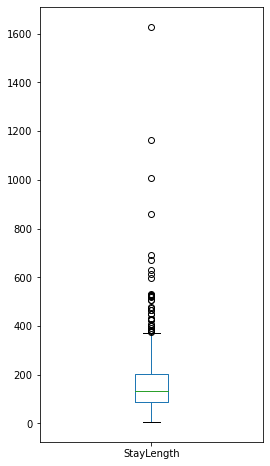

In [129]:
boxpfS.plot(kind = "box")

In [130]:
# remove the top 1% (15) of data for sake of comparison
clinic_df[clinic_df["Assignment"]=="S"].nlargest(15,"StayLength")

,ID,GENDER,AGE,RACE/ETHNICITY,Diagnosis,MD,Assignment,EMR,StayLength,Re_admission,...,X,Y,Z,AA,AB,AC,AD,# Psychotropic Medications,# Administrations,Therapeutic Guidances
1127,1128,M,20,W,Depressive Disorder NOS,B,S,C,1629,0,...,0,0,73,0,2,0,0,2,75,EG
401,402,M,21,W,Depressive Disorder NOS,W,S,C,1162,0,...,0,134,0,50,29,0,0,6,296,EG
228,229,M,25,L,Depressive Disorder NOS,D,S,C,1009,0,...,0,0,0,0,29,0,0,3,133,EG
424,425,F,50,W,"MDD, Single Episode,Severe Without Psychotic F...",W,S,C,859,0,...,0,0,0,36,22,0,0,4,64,EG
984,985,F,59,W,MDD,Q,S,E,692,0,...,0,5,0,0,5,14,0,6,66,EG
222,223,M,28,W,"MDD, Single Episode,Severe Without Psychotic F...",T,S,C,671,0,...,0,0,0,5,10,3,0,7,43,EG
1463,1464,M,45,W,"MDD, Single Episode,Severe Without Psychotic F...",B,S,C,629,0,...,0,27,0,0,26,0,0,5,102,EG
703,704,M,61,W,MDD,Q,S,E,613,0,...,0,11,17,0,15,8,0,4,51,EG
1037,1038,M,55,W,MDD,O,S,E,598,0,...,0,4,6,6,17,4,0,9,76,EG
1175,1176,F,28,W,"MDD, Recurrent, Severe Without Psychotic Features",T,S,C,530,0,...,0,0,0,0,16,0,0,4,47,EG


In [131]:
boxpfSdrop = boxpfS.drop([1127,401,228,424,984,222,1463,703,1037,1175,489,1161,480,937,417])

In [132]:
boxpfSdrop.shape

(503,)

In [133]:
# new describe for S without top 1% outlier
boxpfSdrop.describe()

count    503.000000
mean     155.988072
std       99.617415
min        6.000000
25%       88.000000
50%      134.000000
75%      190.000000
max      519.000000
Name: StayLength, dtype: float64

In [134]:
# for comparison with full data
clinic_df.groupby("Assignment")["StayLength"].describe()

,count,mean,std,min,25%,50%,75%,max
Assignment,,,,,,,,
G,982.0,178.511202,186.889539,14.0,90.0,139.5,189.75,2776.0
S,518.0,172.747104,147.474404,6.0,89.0,135.0,202.00,1629.0


In [135]:
# new describe for G without top 1% outlier
boxpfGdrop.describe()

count    967.000000
mean     162.589452
std      113.579726
min       14.000000
25%       90.000000
50%      138.000000
75%      188.000000
max      723.000000
Name: StayLength, dtype: float64

In [136]:
# very small differences observed for StayLength of both Assignment groups
# Hypothesis is void

PART 2: Difference between EMR C: traditional vs EMR E: system

In [137]:
# Hypothesis: EMR E system should have similar if not better result

PART 2.1: Considering Re-admission

In [138]:
clinic_df["EMR"].value_counts(dropna= False)

C    856
E    644
Name: EMR, dtype: int64

In [139]:
# total re-admission for EMR C
clinic_df[clinic_df["EMR"]=="C"]["Re_admission"].sum()

85

In [140]:
# re-admission percent for all patients under EMR C
convert_percent(85,856)

9.929906542056074

In [141]:
# total re-admission for EMR E
clinic_df[clinic_df["EMR"]=="E"]["Re_admission"].sum()

57

In [142]:
# re-admission percent for all patients under EMR E
convert_percent(57,644)

8.850931677018634

In [143]:
# How many in each assignment for EMR C
clinic_df[clinic_df["EMR"]=="C"].groupby("Assignment")["AGE"].count()

Assignment
G    549
S    307
Name: AGE, dtype: int64

In [144]:
# re-admission percent for all patients under EMR C, by assignment group
clinic_df[clinic_df["EMR"]=="C"].groupby("Assignment")["Re_admission"].sum()

Assignment
G    54
S    31
Name: Re_admission, dtype: int64

In [145]:
# in percent for EMR C, assignment G
convert_percent(54,549)

9.836065573770492

In [146]:
# in percent for EMR C, assignment S
convert_percent(31,307)

10.097719869706841

In [147]:
# re-admission percent for all patients under EMR C, by assignment group
clinic_df[clinic_df["EMR"]=="E"].groupby("Assignment")["AGE"].count()

Assignment
G    433
S    211
Name: AGE, dtype: int64

In [148]:
# re-admission percent for all patients under EMR E, by assignment group
clinic_df[clinic_df["EMR"]=="E"].groupby("Assignment")["Re_admission"].sum()

Assignment
G    45
S    12
Name: Re_admission, dtype: int64

In [149]:
# in percent for EMR E, assignment G
convert_percent(45,433)

10.392609699769054

In [150]:
# in percent for EMR E, assignment S
convert_percent(12,211)

5.687203791469194

In [151]:
# slight difference only but EMR C better?

PART 2.2: Considering StayLength

In [152]:
# for EMR C
clinic_df[clinic_df["EMR"]=="C"]["StayLength"].describe()

count     856.000000
mean      160.448598
std       164.197441
min         6.000000
25%        81.000000
50%       128.000000
75%       179.000000
max      2776.000000
Name: StayLength, dtype: float64

In [153]:
clinic_df[clinic_df["EMR"]=="E"]["StayLength"].describe()

count     644.000000
mean      197.883540
std       184.773899
min        18.000000
25%        97.000000
50%       157.000000
75%       215.000000
max      2685.000000
Name: StayLength, dtype: float64

In [154]:
# EMR C is better

In [155]:
# for EMR C by assignment group
clinic_df[clinic_df["EMR"]=="C"].groupby("Assignment")["StayLength"].describe()

,count,mean,std,min,25%,50%,75%,max
Assignment,,,,,,,,
G,549.0,159.626594,166.096184,14.0,83.0,135.0,176.0,2776.0
S,307.0,161.918567,161.004374,6.0,77.0,120.0,183.0,1629.0


In [156]:
# for EMR C by assignment group
clinic_df[clinic_df["EMR"]=="E"].groupby("Assignment")["StayLength"].describe()

,count,mean,std,min,25%,50%,75%,max
Assignment,,,,,,,,
G,433.0,202.454965,208.065669,18.0,98.0,157.0,210.0,2685.0
S,211.0,188.502370,123.894094,26.0,95.5,157.0,235.0,692.0


In [157]:
# Hypothesis void, EMR C seems better

PART 3: To compare by Diagnosis, the result (stay length) for each Assignment group

In [158]:
clinic_df["Diagnosis"].nunique(dropna=False)

32

In [159]:
# clean data, similar object with different wording found
clinic_df["Diagnosis"].value_counts(dropna=False)

MDD, Recurrent, Severe Without Psychotic Features                                    320
Depressive Disorder NOS                                                              265
MDD, Recurrent, Unspecified                                                          243
MDD, Single Episode,Severe Without Psychotic Features                                238
MDD                                                                                  115
MDD, Single Episode, Severe With Psychotic Features                                  114
MDD, Recurrent, Severe With Psychotic Features                                        84
MDD, Single Episode, Unspecified                                                      26
MDD, Recurrent, Moderate                                                              16
\tMDD, recurrent episode with anxious distress                                        16
MDD, Recurrent, Chronic                                                               13
MDD, recurrent, sever

In [160]:
clinic_df["Diagnosis"].nunique()

32

In [161]:
# renaming similar objects to Diagnosis2 column
clinic_df["Diagnosis2"] = clinic_df["Diagnosis"].map({"Severe episode of recurrent major depressive disorder, without psychotic features" : "MDD, Recurrent, Severe Without Psychotic Features",
                                                     "\tDepression, unspecified type" : "Depression", 
                                                     "MDD, recurrent episodes" : "MDD, Recurrent, Unspecified", 
                                                     "Unspecified Depressive Disorder" : "Depressive Disorder NOS", 
                                                     "Major depressive disorder, recurrent episode with anxious distress" : "\tMDD, recurrent episode with anxious distress"})

In [162]:
clinic_df["Diagnosis2"].value_counts(dropna=False)

NaN                                                  1486
MDD, Recurrent, Severe Without Psychotic Features       5
Depression                                              5
MDD, Recurrent, Unspecified                             2
\tMDD, recurrent episode with anxious distress          1
Depressive Disorder NOS                                 1
Name: Diagnosis2, dtype: int64

In [163]:
clinic_df["Diagnosis2"] = clinic_df["Diagnosis2"].fillna(value=clinic_df["Diagnosis"])

In [164]:
clinic_df[["Diagnosis","Diagnosis2"]].head()

,Diagnosis,Diagnosis2
0,"MDD, Recurrent, Unspecified","MDD, Recurrent, Unspecified"
1,"MDD, Recurrent, Unspecified","MDD, Recurrent, Unspecified"
2,"MDD, Single Episode, Severe With Psychotic Fea...","MDD, Single Episode, Severe With Psychotic Fea..."
3,Depressive Disorder NOS,Depressive Disorder NOS
4,"MDD, Single Episode, Severe With Psychotic Fea...","MDD, Single Episode, Severe With Psychotic Fea..."


In [165]:
clinic_df["Diagnosis2"].value_counts(dropna= False)

MDD, Recurrent, Severe Without Psychotic Features                       325
Depressive Disorder NOS                                                 266
MDD, Recurrent, Unspecified                                             245
MDD, Single Episode,Severe Without Psychotic Features                   238
MDD                                                                     115
MDD, Single Episode, Severe With Psychotic Features                     114
MDD, Recurrent, Severe With Psychotic Features                           84
MDD, Single Episode, Unspecified                                         26
\tMDD, recurrent episode with anxious distress                           17
MDD, Recurrent, Moderate                                                 16
MDD, Recurrent, Chronic                                                  13
Depression                                                               10
MDD, recurrent, severe                                                   10
MDD, Single 

In [166]:
clinic_df["Diagnosis2"].nunique()

27

In [167]:
# remove \t from one object
def rename_object(line):
    line_dict = {"\tMDD, recurrent episode with anxious distress" : "MDD, recurrent episode with anxious distress"}
    if line in line_dict:
        return line_dict[line]
    else:
        return line

In [168]:
clinic_df["Diagnosis2"] = clinic_df["Diagnosis2"].apply(rename_object)

In [169]:
clinic_df["Diagnosis2"].value_counts(dropna= False)

MDD, Recurrent, Severe Without Psychotic Features                       325
Depressive Disorder NOS                                                 266
MDD, Recurrent, Unspecified                                             245
MDD, Single Episode,Severe Without Psychotic Features                   238
MDD                                                                     115
MDD, Single Episode, Severe With Psychotic Features                     114
MDD, Recurrent, Severe With Psychotic Features                           84
MDD, Single Episode, Unspecified                                         26
MDD, recurrent episode with anxious distress                             17
MDD, Recurrent, Moderate                                                 16
MDD, Recurrent, Chronic                                                  13
Depression                                                               10
MDD, recurrent, severe                                                   10
MDD, Single 

In [170]:
# split to seperate assignment groups
G_SYMP = clinic_df[clinic_df["Assignment"] == "G"]["Diagnosis2"]

In [171]:
# for assignment G
G_SYMP.value_counts()

MDD, Recurrent, Severe Without Psychotic Features                       224
Depressive Disorder NOS                                                 165
MDD, Single Episode,Severe Without Psychotic Features                   158
MDD, Recurrent, Unspecified                                             152
MDD, Single Episode, Severe With Psychotic Features                      76
MDD                                                                      74
MDD, Recurrent, Severe With Psychotic Features                           51
MDD, Single Episode, Unspecified                                         17
MDD, recurrent episode with anxious distress                             15
MDD, Recurrent, Moderate                                                 13
MDD, recurrent, severe                                                   10
MDD, Recurrent, Chronic                                                   9
Depression                                                                7
MDD, Recurre

In [172]:
G_SYMP.nunique()

23

In [173]:
# for Assignment S
S_SYMP = clinic_df[clinic_df["Assignment"] == "S"]["Diagnosis2"]

In [174]:
S_SYMP.value_counts()

Depressive Disorder NOS                                  101
MDD, Recurrent, Severe Without Psychotic Features        101
MDD, Recurrent, Unspecified                               93
MDD, Single Episode,Severe Without Psychotic Features     80
MDD                                                       41
MDD, Single Episode, Severe With Psychotic Features       38
MDD, Recurrent, Severe With Psychotic Features            33
MDD, Single Episode, Unspecified                           9
MDD, Recurrent, Chronic                                    4
MDD, Single Episode, Moderate                              4
MDD, Recurrent, Moderate                                   3
Depression                                                 3
MDD, recurrent episode with anxious distress               2
Depression with suicidal ideation                          2
MDD, Single Episode, Mild                                  1
Mood Disorder NOS                                          1
Adjustment Disorder With

In [175]:
S_SYMP.nunique()

18

In [176]:
# mean of staylength for each diagnosis in G
clinic_df.groupby(G_SYMP)["StayLength"].mean()

Diagnosis2
Bipolar II Disorder                                                      84.000000
Depression                                                              222.142857
Depressive Disorder NOS                                                 170.448485
Dissociative Disorder NOS                                               121.000000
MDD                                                                     261.081081
MDD, Recurrent, Chronic                                                 149.666667
MDD, Recurrent, Mild                                                    284.500000
MDD, Recurrent, Moderate                                                162.230769
MDD, Recurrent, Severe With Psychotic Features                          166.862745
MDD, Recurrent, Severe Without Psychotic Features                       183.669643
MDD, Recurrent, Unspecified                                             168.585526
MDD, Single Episode, Mild                                                63.

In [177]:
# mean of staylength for each diagnosis in S
clinic_df.groupby(S_SYMP)["StayLength"].mean()

Diagnosis2
Adjustment Disorder With Depressed Mood                  145.000000
Depression                                               231.000000
Depression with suicidal ideation                        314.500000
Depressive Disorder NOS                                  176.643564
MDD                                                      220.780488
MDD, Recurrent, Chronic                                  166.250000
MDD, Recurrent, Moderate                                 173.666667
MDD, Recurrent, Severe With Psychotic Features           202.636364
MDD, Recurrent, Severe Without Psychotic Features        173.732673
MDD, Recurrent, Unspecified                              157.279570
MDD, Single Episode, Mild                                 63.000000
MDD, Single Episode, Moderate                             89.750000
MDD, Single Episode, Severe With Psychotic Features      141.552632
MDD, Single Episode, Unspecified                         133.666667
MDD, Single Episode,Severe Without Ps

In [178]:
graph_dataG = clinic_df.groupby(G_SYMP)["StayLength"].mean()
graph_dataS = clinic_df.groupby(S_SYMP)["StayLength"].mean()

In [179]:
part3df = pd.DataFrame({"Assignment_G":graph_dataG,"Assignment_S":graph_dataS})

Text(0, 0.5, 'Mean of stay length')

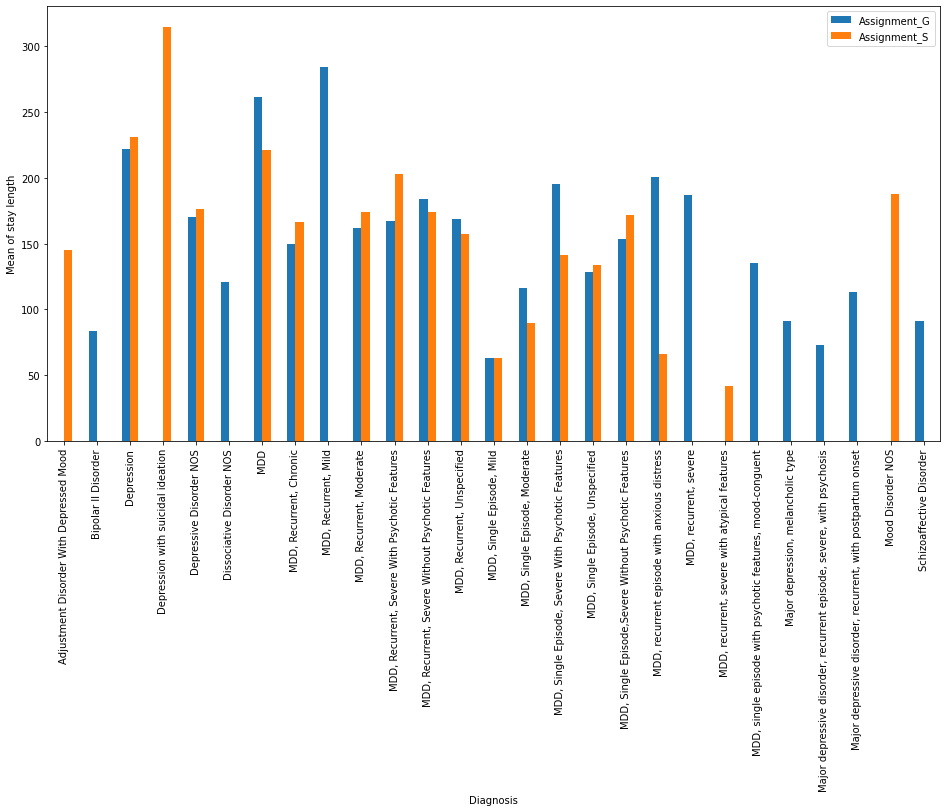

In [180]:
plt.rcParams["figure.figsize"] = (16,8)
part3df.plot(kind="bar")
plt.xlabel("Diagnosis")
plt.ylabel("Mean of stay length")

In [181]:
# In general, Assignment G expected to have better results

PART 4: More factors

In [182]:
# adding gender and age as parameters for the largest data group(patients with similar symptoms)
# to determine effect of gender and age, if significant then split by assignment group

In [183]:
# Pick the largest subset
clinic_df["Diagnosis2"].value_counts(dropna=False)

MDD, Recurrent, Severe Without Psychotic Features                       325
Depressive Disorder NOS                                                 266
MDD, Recurrent, Unspecified                                             245
MDD, Single Episode,Severe Without Psychotic Features                   238
MDD                                                                     115
MDD, Single Episode, Severe With Psychotic Features                     114
MDD, Recurrent, Severe With Psychotic Features                           84
MDD, Single Episode, Unspecified                                         26
MDD, recurrent episode with anxious distress                             17
MDD, Recurrent, Moderate                                                 16
MDD, Recurrent, Chronic                                                  13
Depression                                                               10
MDD, recurrent, severe                                                   10
MDD, Single 

In [184]:
sub_df = clinic_df[clinic_df["Diagnosis2"]=="MDD, Recurrent, Severe Without Psychotic Features"]

In [185]:
sub_df.head(3)

,ID,GENDER,AGE,RACE/ETHNICITY,Diagnosis,MD,Assignment,EMR,StayLength,Re_admission,...,Y,Z,AA,AB,AC,AD,# Psychotropic Medications,# Administrations,Therapeutic Guidances,Diagnosis2
107,108,F,50,W,"MDD, Recurrent, Severe Without Psychotic Features",I,G,C,158,0,...,0,0,0,1,0,0,3,27,EG,"MDD, Recurrent, Severe Without Psychotic Features"
243,244,F,36,W,"MDD, Recurrent, Severe Without Psychotic Features",L,G,C,14,0,...,0,0,0,0,0,0,0,0,CT,"MDD, Recurrent, Severe Without Psychotic Features"
464,465,M,53,L,"MDD, Recurrent, Severe Without Psychotic Features",L,G,C,139,0,...,12,0,0,0,0,0,3,19,TL,"MDD, Recurrent, Severe Without Psychotic Features"


In [186]:
sub_df.shape

(325, 44)

In [187]:
# split by AGE (2 groups), gender (2 groups)

In [188]:
sub_df[["AGE"]].describe()

,AGE
count,325.000000
mean,37.366154
std,16.333279
min,18.000000
25%,23.000000
50%,34.000000
75%,52.000000
max,87.000000


In [189]:
# seperate age to 2 groups by median
def rename_age(age):
    if age < 34:
        return f"Young"
    else:
        return f"Old"

In [190]:
sub_df["AGE"] = sub_df["AGE"].apply(rename_age)

<ipython-input-190-a1ae6e42bd32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["AGE"] = sub_df["AGE"].apply(rename_age)


In [191]:
sub_df[["AGE"]].head()

,AGE
107,Old
243,Old
464,Old
466,Old
467,Old


In [192]:
sub_df[["AGE"]].shape

(325, 1)

In [193]:
sub_df.groupby(by=["AGE", "GENDER"])["StayLength"].count()

AGE    GENDER
Old    F         82
       M         82
Young  F         90
       M         71
Name: StayLength, dtype: int64

In [194]:
sub_df.groupby(by=["AGE", "GENDER"])["StayLength"].mean()

AGE    GENDER
Old    F         184.121951
       M         209.707317
Young  F         142.844444
       M         190.690141
Name: StayLength, dtype: float64

In [ ]:
# young female group have lesser stay length
# can allow for further parameter consideration...

PART 5: Check relationship between # Psychotropic Medications and # Administrations

In [ ]:
# does having more types of medicine means lesser doses required 
# immunity (stronger dose for repeated)

In [197]:
# Administration means doses of medicine
clinic_df.head(3)

,ID,GENDER,AGE,RACE/ETHNICITY,Diagnosis,MD,Assignment,EMR,StayLength,Re_admission,...,Y,Z,AA,AB,AC,AD,no_of_medicine_type,# Administrations,Therapeutic Guidances,Diagnosis2
0,1,F,49,W,"MDD, Recurrent, Unspecified",L,G,C,70,0,...,0,0,0,1,0,0,3,6,EG,"MDD, Recurrent, Unspecified"
1,2,F,21,W,"MDD, Recurrent, Unspecified",A,G,C,309,0,...,13,0,0,0,0,0,3,27,CT,"MDD, Recurrent, Unspecified"
2,3,M,28,L,"MDD, Single Episode, Severe With Psychotic Fea...",I,G,C,376,0,...,0,15,0,4,0,0,6,64,CT,"MDD, Single Episode, Severe With Psychotic Fea..."


In [198]:
clinic_df.rename(columns={"# Psychotropic Medications": "no_of_medicine_type"},inplace= True)
clinic_df.head(3)

,ID,GENDER,AGE,RACE/ETHNICITY,Diagnosis,MD,Assignment,EMR,StayLength,Re_admission,...,Y,Z,AA,AB,AC,AD,no_of_medicine_type,# Administrations,Therapeutic Guidances,Diagnosis2
0,1,F,49,W,"MDD, Recurrent, Unspecified",L,G,C,70,0,...,0,0,0,1,0,0,3,6,EG,"MDD, Recurrent, Unspecified"
1,2,F,21,W,"MDD, Recurrent, Unspecified",A,G,C,309,0,...,13,0,0,0,0,0,3,27,CT,"MDD, Recurrent, Unspecified"
2,3,M,28,L,"MDD, Single Episode, Severe With Psychotic Fea...",I,G,C,376,0,...,0,15,0,4,0,0,6,64,CT,"MDD, Single Episode, Severe With Psychotic Fea..."


<AxesSubplot:xlabel='no_of_medicine_type', ylabel='# Administrations'>

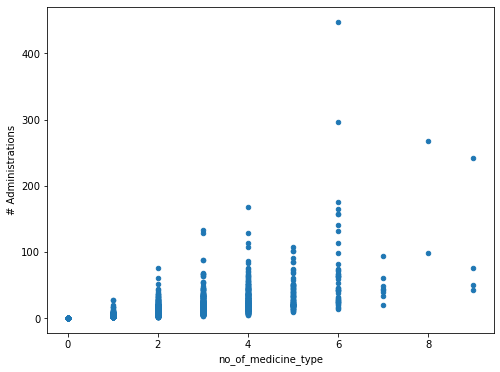

In [199]:
clinic_df.plot(kind="scatter", x = "no_of_medicine_type", y ="# Administrations",
               figsize = (8,6))

In [ ]:
# no relationship found between the 2 column data